## <b> Appendix 1: Python Code and Output
<br>

<b> What impacts house prices ('SalePrice') the most in Ames, Iowa? </b>
<br><br>
Our hypothesis is that house prices will be most sensitive to overall construction quality, the age of the house, living area, and outdoor space. We will test this hypothesis by exploring the distribution of the target variable, `SalePrice`, and the linear relationships exhibited by the other features to the target. Through this analysis, we aim to derive valuable insights from the Ames housing market so as to support better decision-making.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 0. Importing the dataset and exploring its composition

In [3]:
# Importing training data
train = pd.read_csv('train.csv')

# Displaying the first few rows of the training data
display(train.head())

# Displaying the shape of the training data
print(f"Shape of the training data:", train.shape[0], "rows and", train.shape[1], "columns")

# Displaying the description of the training data
print("\nDescription of the training data:")
display(round(train.describe().T, 4)) # Transpose for better readability

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Shape of the training data: 1460 rows and 81 columns

Description of the training data:


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.5000,421.6100,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.8973,42.3006,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.0500,24.2848,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.8281,9981.2649,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.0993,1.3830,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.5753,1.1128,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.2678,30.2029,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.8658,20.6454,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.6853,181.0662,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.6397,456.0981,0.0,0.00,383.5,712.25,5644.0


### 1. Exploring the distribution of 'SalePrice' and describing the training data

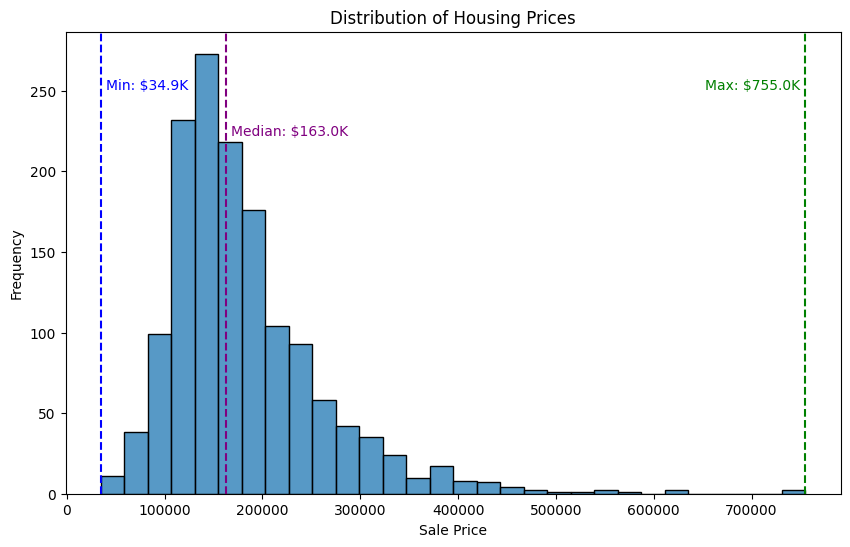

In [4]:
# Histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], bins=30)
plt.title('Distribution of Housing Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Calculate mean, min, median, and max prices
min_price = train['SalePrice'].min()
median_price = train['SalePrice'].median()
max_price = train['SalePrice'].max()

# Add a vertical line for the mean, max, min, and median
plt.axvline(min_price, color='blue', linestyle='--', label=f'Min: {min_price}')
plt.axvline(median_price, color='purple', linestyle='--', label=f'Median: {median_price}')
plt.axvline(max_price, color='green', linestyle='--', label=f'Max: {max_price}')

# Annotate max, min, and median home prices
plt.text(min_price + 5000, plt.ylim()[1]*0.9, f'Min: ${min_price/1000}K', color='blue', ha='left', va='top')
plt.text(median_price + 5000, plt.ylim()[1]*0.8, f'Median: ${median_price/1000}K', color='purple', ha='left', va='top')
plt.text(max_price - 5000, plt.ylim()[1]*0.9, f'Max: ${max_price/1000}K', color='green', ha='right', va='top')

# Displaying the plot
plt.show()

<i> Observing the histogram, we see that the distribution is right skewed i.e., lower house prices are more frequent than higher house prices in Ames, Iowa. This skew could potentially cause under or overfit when trying to predict using new data. We will normalize the distribution to fit it better.  We will generate a box plot to understand the extent of outliers.

Text(0.5, 1.0, 'Boxplot of Sale Price')

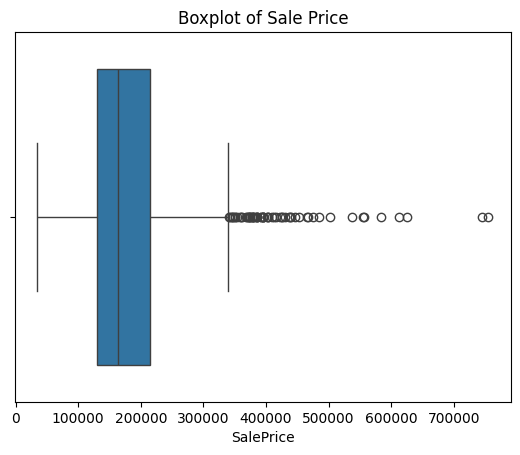

In [5]:
# Generating a Boxplot of the Sale Price
sns.boxplot(x=train['SalePrice'])
plt.title('Boxplot of Sale Price')

Observing the boxplot, we note that the `SalePrice` has several outliers (i.e., home prices over $500K). Though low in number, these outliers can inadvertently throw off any linear relationships we may explore.

Text(0, 0.5, 'Frequency')

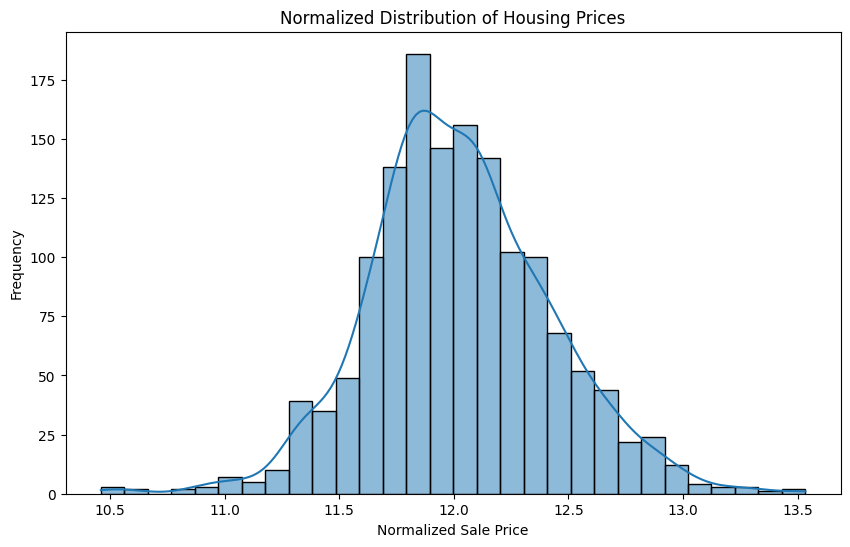

In [6]:
# Normalizing the SalePrice for better visualization
train['SalePrice_normalized'] = np.log1p(train['SalePrice'])

# Plotting Hhistogram of the normalized SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice_normalized'], bins=30, kde=True)

plt.title('Normalized Distribution of Housing Prices')
plt.xlabel('Normalized Sale Price')
plt.ylabel('Frequency')

<i> Post log transformation, the `SalePrice` distribution has now transformed into a more symmetric, bell-shaped distribution. This will help us model the data more effectively.

In [7]:
# Evaluating outliers in the 'SalePrice' variable using IQR method
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_no_outliers = train[(train['SalePrice'] >= lower_bound) & (train['SalePrice'] <= upper_bound)]

In [8]:
# Evaluating and displaying the percentage of outliers in the training data
outlier_count = len(train) - len(train_no_outliers)
outlier_pct = outlier_count / len(train) * 100
print(f"Number of outliers: {outlier_count} ({outlier_pct:.2f}% of the data)")

Number of outliers: 61 (4.18% of the data)


To test the robustness of our outlier analysis, we will calculate the outlier count as a % of population and also compare this method to the number of outliers identified by the Z-score (using mean and standard deviation to flag outliers) and modified Z-score (using median and modified absolute deviation) methods. 

In [9]:
# Compare different outlier detection methods
from scipy import stats

# Calculating outliers in other methods
## Z-score method
z_scores = np.abs(stats.zscore(train['SalePrice']))
z_outliers = len(train[z_scores > 3])

## Modified Z-score method  
median = np.median(train['SalePrice'])
mad = np.median(np.abs(train['SalePrice'] - median))
modified_z_scores = 0.6745 * (train['SalePrice'] - median) / mad
modified_z_outliers = len(train[np.abs(modified_z_scores) > 3.5])

# Displaying the results
print(f"Z-score method: {z_outliers} ({z_outliers / len(train) * 100:.2f}% of the data)") 
print(f"Modified Z-score method: {modified_z_outliers} ({modified_z_outliers / len(train) * 100:.2f}% of the data)")

Z-score method: 22 (1.51% of the data)
Modified Z-score method: 51 (3.49% of the data)


We elect to retain the outliers in further analysis (~4% of the observations on an interquartile basis), as they provide important insights into price variation and may also form a valuable market segment. Additionally, the IQR method is simple to understand and is valuable in skewed data evaluations. The numbers of outliers based on the Modified Z-Score method is roughly the same as IQR, further supporting our evaluation.

### 2. Finding and investigating missing values

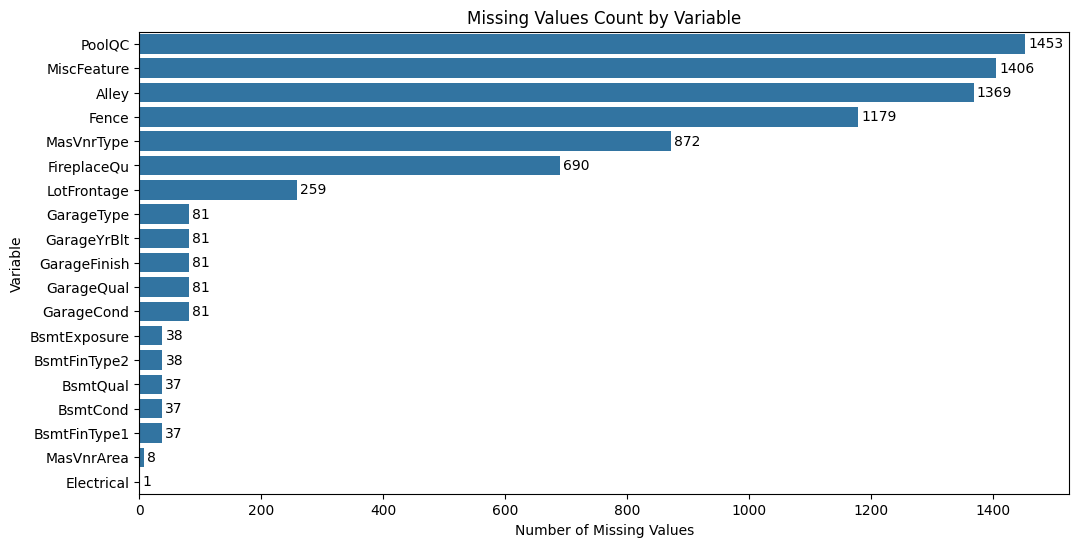

In [10]:
# Calculating missing values by each variable
missing_counts = train.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False) # Filter out variables with no missing values

# Plotting the missing values count in a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing_counts.values, y=missing_counts.index)
plt.xlabel('Number of Missing Values')
plt.ylabel('Variable')
plt.title('Missing Values Count by Variable')

# Adding data labels for clarity
for i, v in enumerate(missing_counts.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.show()

Let's explore the distribution of these missing values, i.e., are they missing at random or in some pattern?

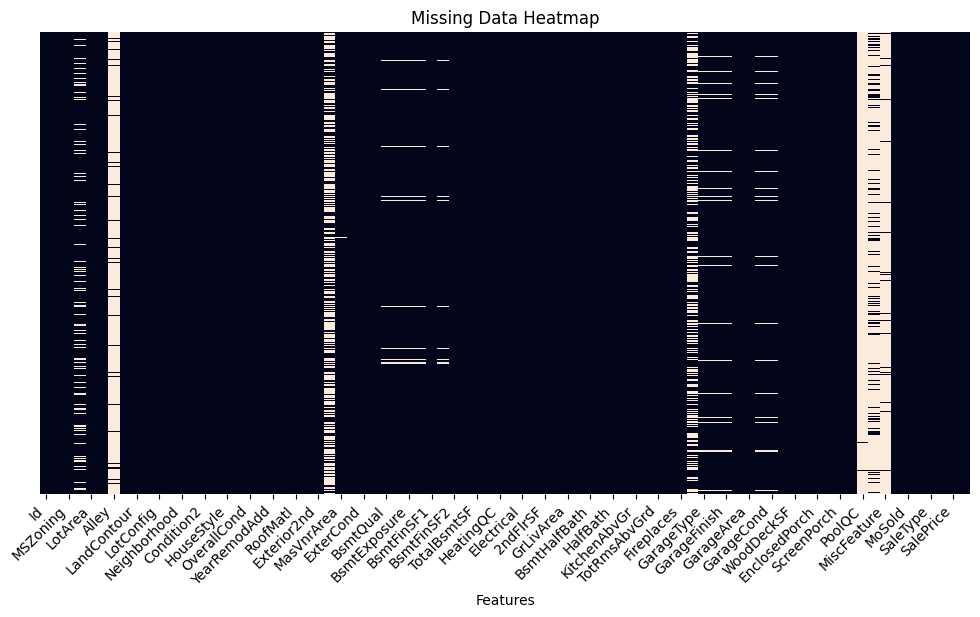

In [11]:
# Plot heatmap of missingness (1 = missing, 0 = not missing)
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.show()


<i> The training data has 1,460 rows, however a vast majority of records do not have any values for 'PoolQC', 'MiscFeature', 'Alley', 'Fence', and 'MasVnrType'. The missing values also do not seem to have any pattern or clustering. We will therefore be dropping these values from further analysis.

In [12]:
# Dropping columns with too many missing values
reduced_train = train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType'], axis=1)

# Displaying the shape of the reduced training data
print(f"Shape of the reduced training data:", reduced_train.shape[0], "rows and", reduced_train.shape[1], "columns")

Shape of the reduced training data: 1460 rows and 77 columns


<i> For the other variables with missing values, we will be filling blanks in numeric columns with '0' and non-numeric columns with 'NA'.

In [13]:
# Filling missing values: numeric columns with 0, non-numeric columns with 'NA'
for col in reduced_train.columns:
    if reduced_train[col].dtype in [np.float64, np.int64]:
        reduced_train[col] = reduced_train[col].fillna(0)
    else:
        reduced_train[col] = reduced_train[col].fillna('NA')

# Checking if missing values remain in case there are other data types in the dataset
if reduced_train.isnull().sum().any():
    print("There are still missing values after filling:")
    display(reduced_train.isnull().sum()[reduced_train.isnull().sum() > 0])
else:
    print("No missing values remain after filling.")

No missing values remain after filling.


In [14]:
# Identifying numeric columns in the reduced training data and training data
numeric_cols = reduced_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('SalePrice')

numeric_cols_in_train = train.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_in_train.remove('SalePrice')

In [15]:
# Identifying common numeric columns to compare correlation
common_cols = list(set(numeric_cols).intersection(numeric_cols_in_train))

# Computing correlation scores for the reduced and original datasets
corr_reduced = reduced_train[common_cols].corr()
corr_original = train[common_cols].corr()

# Computing mean absolute correlation differences
mean_abs_diff = np.mean(np.abs(corr_reduced - corr_original))
print("Mean absolute correlation difference:", round(mean_abs_diff * 100, 2), "%")

Mean absolute correlation difference: 1.1 %


<i> Interpreting the results: A Mean Absolute Difference ~1% between the two datasets denotes that reducing the number of features to evaluate did not result in any major differences.

### 3. Investigate potential predictors of the dependent variable, 'SalePrice_normalized', and visualizing their relationships.

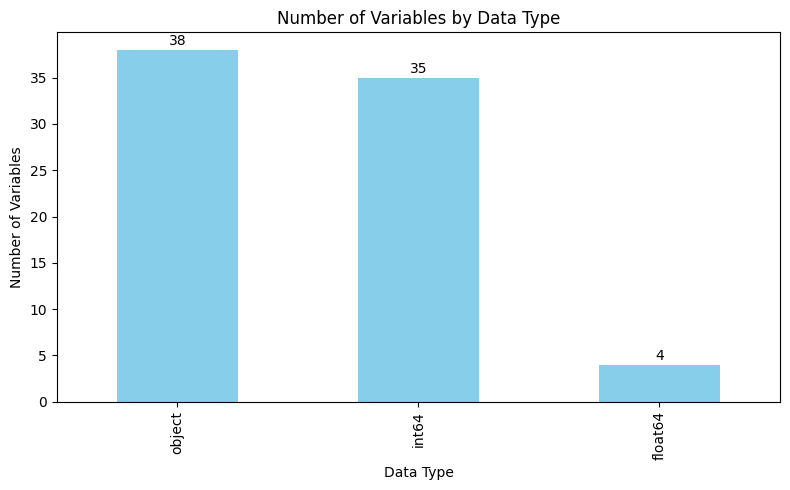

In [16]:
data_types = reduced_train.dtypes.value_counts()

# Plotting the data types of the variables
plt.figure(figsize=(8, 5))
ax = data_types.plot(kind='bar', color='skyblue')

# Adding data labels for clarity
for i, v in enumerate(data_types.values):
    ax.text(i, v + 0.5, str(v), color='black', ha='center')

plt.ylabel('Number of Variables')
plt.xlabel('Data Type')
plt.title('Number of Variables by Data Type')
plt.tight_layout()
plt.show()

It seems that the reduced training data has ~40 categorical variables and around the same number of numerical variables. 
1. First, we will evaluate the correlation of just the numeric features to `SalePrice_normalized` and select the top 10 features to explore further.
2. Then, we will convert these categorical variables into dummy variables and evaluate their correlation with `SalePrice_normalized`.
3. Finally, we will compare the numeric features' correlation to the dummy variables' correlation and check if it is worth including the dummy variables into our top features.

#### Step 1: Numeric feature evaluation

In [17]:
# Select top 10 features most correlated with SalePrice_normalized (excluding SalePrice_normalized itself)
top_features = corr_reduced['SalePrice_normalized'].abs().sort_values(ascending=False).drop(['SalePrice_normalized', 'SalePrice'], errors='ignore').head(10).index.tolist()

# Print top 10 features and their correlations as a DataFrame (as %)
top_num_df = corr_reduced.loc[top_features, 'SalePrice_normalized'].to_frame(name='CorrelationWithSalePriceNormalized')
top_num_df['CorrelationWithSalePriceNormalized'] = round(top_num_df['CorrelationWithSalePriceNormalized'] * 100, 2)
display(top_num_df)

,CorrelationWithSalePriceNormalized
OverallQual,81.72
GrLivArea,70.09
GarageCars,68.06
GarageArea,65.09
TotalBsmtSF,61.21
1stFlrSF,59.70
FullBath,59.48
YearBuilt,58.66
YearRemodAdd,56.56
TotRmsAbvGrd,53.44


`OverallQual` is the number one numeric predictor of `SalePrice_normalized` (~82%). `GrLivArea` and `GarageCars` are the next best predictors. Of the top 10, `TotRmsAbvGrd` has the lowest correlation score, which is still significant at ~53%. Logically speaking, home prices will generally be influenced by higher quality ratings, larger living areas, and more garage capacity. The top features seem sensible.

#### Step 2: Categorical feature evaluation

In [18]:
# Creating dummy variables for categorical features
reduced_train_cat = pd.get_dummies(reduced_train, drop_first=False) # Creating a new DataFrame with dummy variables to avoid modifying the original DataFrame

# Displaying the shape of the final processed training data
print(f"Shape of the reduced training data with dummy variables:", reduced_train_cat.shape[0], "rows and", reduced_train_cat.shape[1], "columns")

Shape of the reduced training data with dummy variables: 1460 rows and 285 columns


In [19]:
dummy_only_cols = [col for col in reduced_train_cat.columns if col not in reduced_train.columns]

# Compute correlation of each dummy variable with SalePrice_normalized
dummy_corrs = reduced_train_cat[dummy_only_cols].corrwith(reduced_train_cat['SalePrice_normalized']).abs().sort_values(ascending=False)

# Select top 10 dummy variables most correlated with SalePrice_normalized
cat_top_features = dummy_corrs.head(10).index.tolist()

# Print top 10 dummy features and their correlations as a DataFrame (as %)
top_cat_df = dummy_corrs.head(10).to_frame(name='CorrelationWithSalePriceNormalized')
top_cat_df['CorrelationWithSalePriceNormalized'] = round(top_cat_df['CorrelationWithSalePriceNormalized'] * 100, 2)
display(top_cat_df)

,CorrelationWithSalePriceNormalized
ExterQual_TA,59.59
KitchenQual_TA,53.82
Foundation_PConc,53.08
FireplaceQu_NA,51.00
ExterQual_Gd,50.97
BsmtQual_TA,47.76
HeatingQC_Ex,46.67
BsmtQual_Ex,46.40
BsmtFinType1_GLQ,44.08
GarageFinish_Unf,43.20


In [20]:
# Compare top_cat_df with top_num_df and find if any top_cat_df has a higher correlation than the top numeric features
top_cat_df['IsHigherThanTopNumeric'] = top_cat_df['CorrelationWithSalePriceNormalized'] > top_num_df['CorrelationWithSalePriceNormalized'].min()
display(top_cat_df[top_cat_df['IsHigherThanTopNumeric'] == True])

,CorrelationWithSalePriceNormalized,IsHigherThanTopNumeric
ExterQual_TA,59.59,True
KitchenQual_TA,53.82,True


Logically, buyers would care about exterior quality (i.e., "curb appeal") and kitchen quality and factor them into their pricing. Therefore, it is not a huge surprise that `ExterQual_TA` (Typical/Average Exterior Quality) and `KitchenQual_TA` (Typical/Average Kitchen Quality) have strong correlation to the normalized sale price.

We will add these to the top numeric features and analyze their relationships to `SalePrice_normalized`.

In [21]:
# Concatenate top numeric and top_cat_df[top_cat_df['IsHigherThanTopNumeric'] == True]
top_features_combined = pd.concat([top_num_df, top_cat_df[top_cat_df['IsHigherThanTopNumeric'] == True]], axis=0)
top_features_combined = top_features_combined.sort_values(by='CorrelationWithSalePriceNormalized', ascending=False)
top_features_combined = top_features_combined.drop(columns='IsHigherThanTopNumeric', errors='ignore')
top_features_combined

,CorrelationWithSalePriceNormalized
OverallQual,81.72
GrLivArea,70.09
GarageCars,68.06
GarageArea,65.09
TotalBsmtSF,61.21
1stFlrSF,59.70
ExterQual_TA,59.59
FullBath,59.48
YearBuilt,58.66
YearRemodAdd,56.56


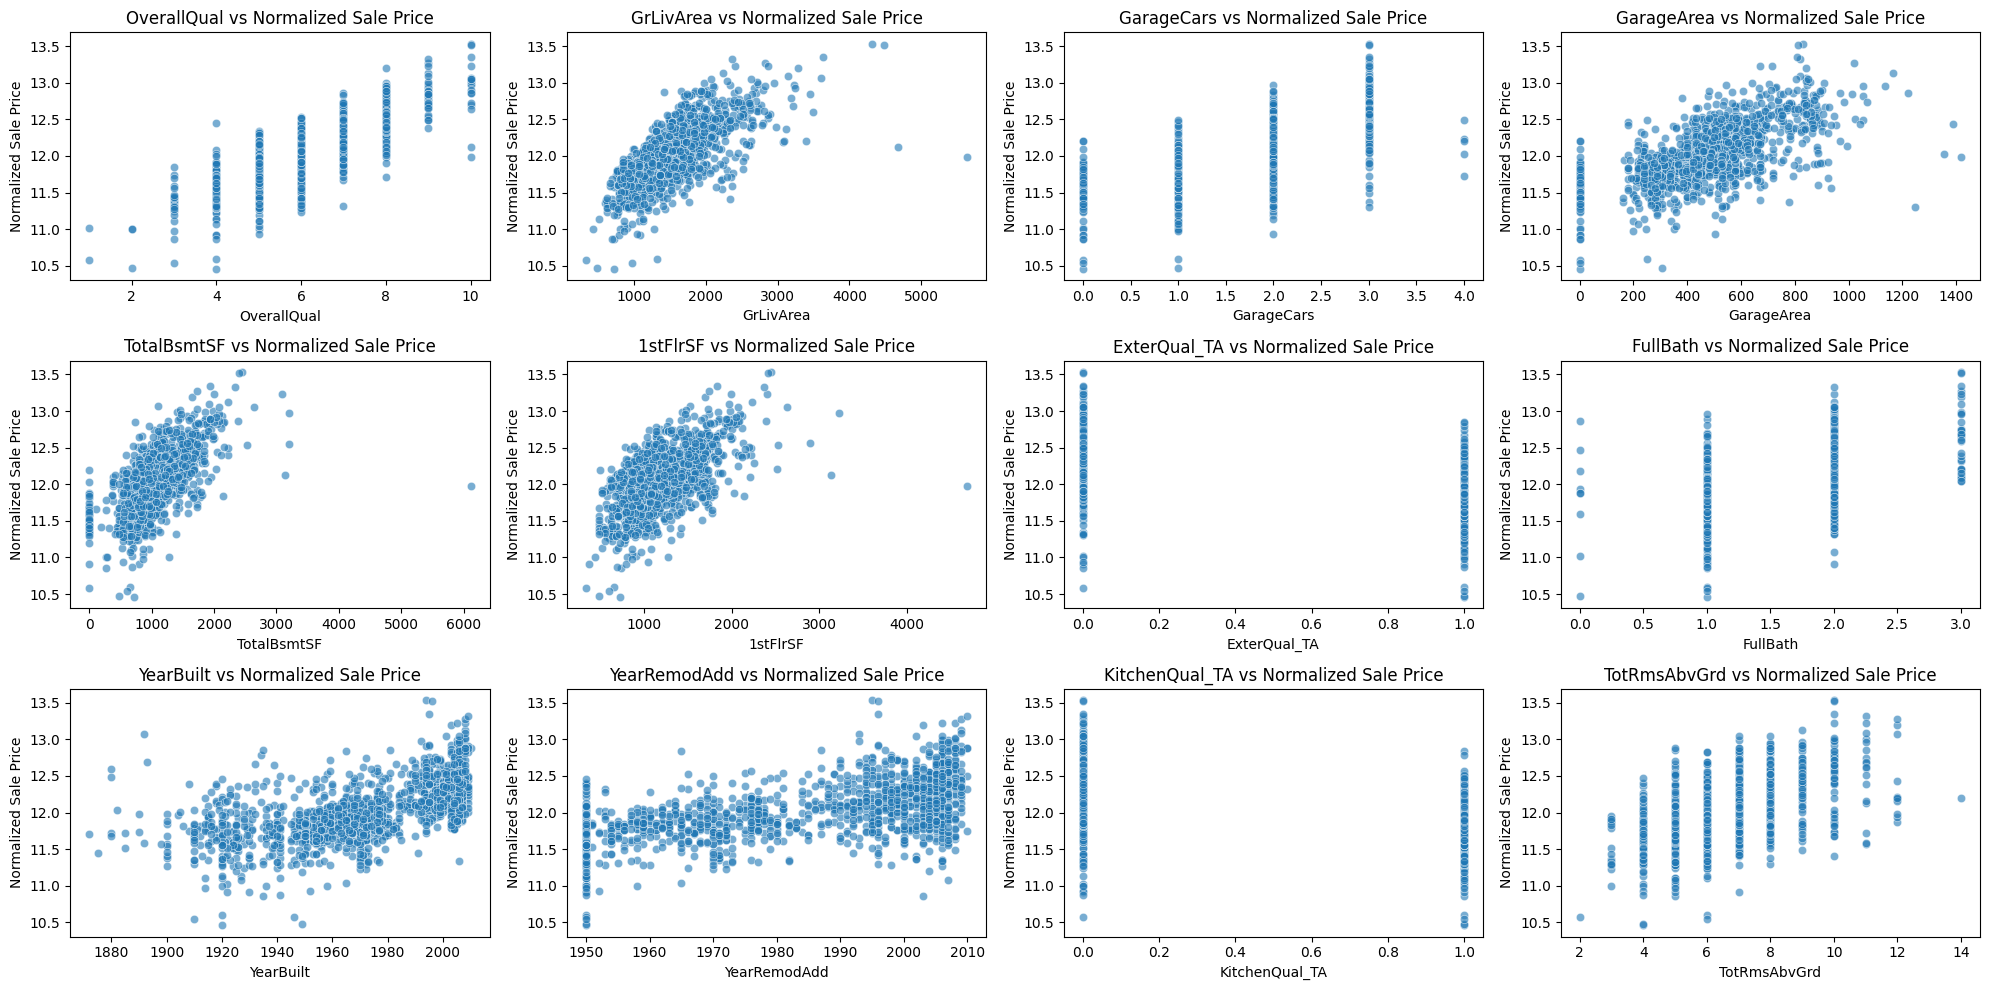

In [22]:
# Generating scatterplots of each top feature vs SalePrice_normalized
plt.figure(figsize=(20, 10))
for idx, feature in enumerate(top_features_combined.index.to_list()):
    plt.subplot(3, 4, idx + 1)
    sns.scatterplot(x=reduced_train_cat[feature], y=reduced_train_cat['SalePrice_normalized'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Normalized Sale Price')
    plt.title(f'{feature} vs Normalized Sale Price')
plt.tight_layout()
plt.show()

### 4. Feature exploration to check if any new predictor(s) can be created by splitting, merging, or otherwise interacting with existing features.

There are some features like `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, and `ScreenPorch` which seem related on a business-level. We will combine them together to create a new feature and examine the new feature's correlation to `SalePrice_normalized`.

Correlation of 'OutdoorArea' with normalized Sale Price: 19.52%


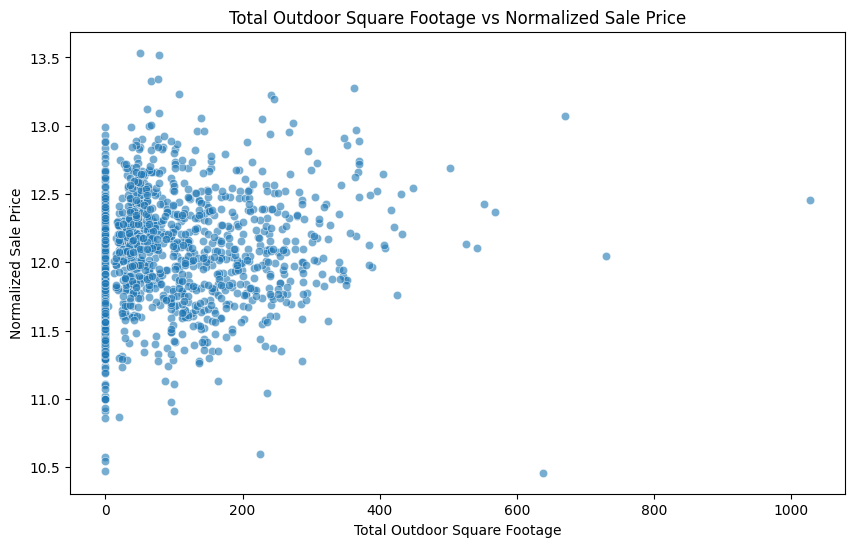

In [23]:
# Create new variable 'OutdoorArea' as the sum of 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', and 'ScreenPorch'
reduced_train_cat['OutdoorArea'] = (reduced_train_cat['OpenPorchSF'] +
                                reduced_train_cat['EnclosedPorch'] +
                                reduced_train_cat['3SsnPorch'] +
                                reduced_train_cat['ScreenPorch'])

# Get correlation of 'OutdoorArea' with 'SalePrice_normalized'. 
outdoor_area_corr = reduced_train_cat['OutdoorArea'].corr(reduced_train_cat['SalePrice_normalized'])
print(f"Correlation of 'OutdoorArea' with normalized Sale Price: {outdoor_area_corr*100:.2f}%")

# Scatterplot of 'OutdoorArea' vs 'SalePrice_normalized'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_train_cat['OutdoorArea'], y=reduced_train_cat['SalePrice_normalized'], alpha=0.6)
plt.xlabel('Total Outdoor Square Footage')
plt.ylabel('Normalized Sale Price')
plt.title('Total Outdoor Square Footage vs Normalized Sale Price')
plt.show()

`OutdoorArea` does not seem to have a significant correlation with house prices. This might be because outdoor areas don’t impact the house's price/appeal that strongly in Ames, Iowa, which experiences extreme snowfall. 

Let's see if we can examine other like variables, `TotalBsmtSF` & `GrLivArea`, that seem related on a business-level. We will combine them together to create a new feature and examine the new feature's correlation to `SalePrice_normalized`.

Correlation of 'TotalSF' with normalized Sale Price: 77.33%


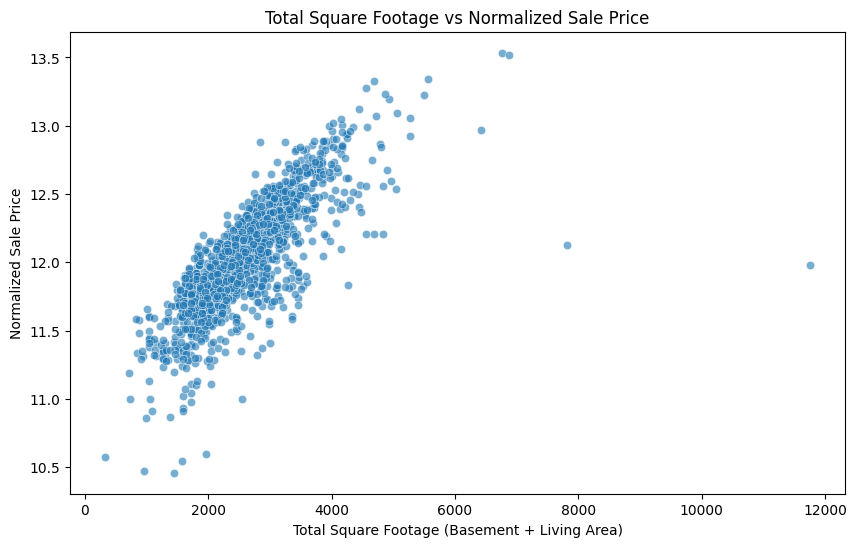

In [24]:
# Create a variable 'TotalSF' as the sum of 'TotalBsmtSF' and 'GrLivArea'
reduced_train_cat['TotalSF'] = reduced_train_cat['TotalBsmtSF'] + reduced_train_cat['GrLivArea']

# Get correlation of 'TotalSF' with 'SalePrice_normalized'
total_sf_corr = reduced_train_cat['TotalSF'].corr(reduced_train_cat['SalePrice_normalized'])
print(f"Correlation of 'TotalSF' with normalized Sale Price: {total_sf_corr*100:.2f}%")

# Scatterplot of 'TotalSF' vs 'SalePrice_normalized'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_train_cat['TotalSF'], y=reduced_train_cat['SalePrice_normalized'], alpha=0.6)
plt.xlabel('Total Square Footage (Basement + Living Area)')
plt.ylabel('Normalized Sale Price')
plt.title('Total Square Footage vs Normalized Sale Price')
plt.show()

This is definitely a significant relationship. Let's test another feature before we conclude, by combining all full and half bathrooms (with half baths weighted as 0.5), to find out if the total number of bathrooms can change the sale price of a house. We will examine the new feature's correlation to `SalePrice_normalized`.

Correlation of 'Total No. of Bathrooms' with normalized Sale Price: 67.30%


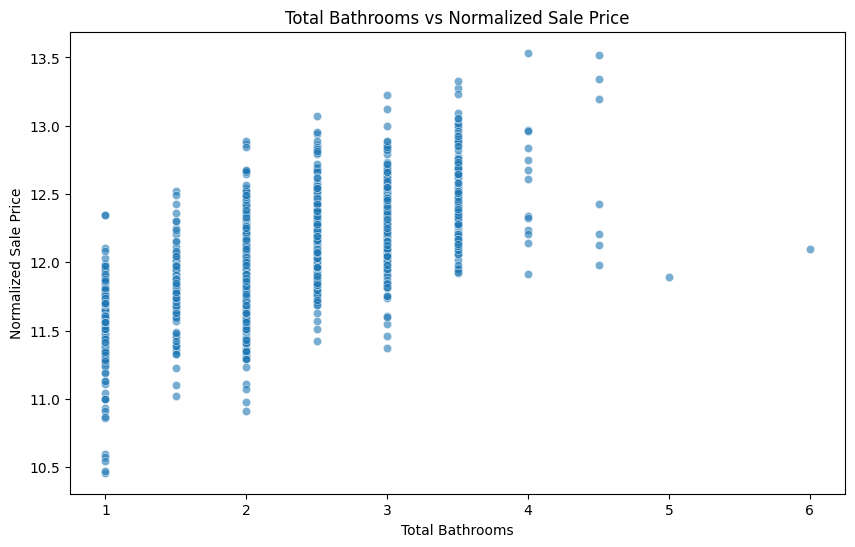

In [25]:
# Create a variable 'TotalBathrooms' as the sum of [FullBath + (0.5 × HalfBath) + BsmtFullBath + (0.5 × BsmtHalfBath)]
reduced_train_cat['TotalBathrooms'] = (reduced_train_cat['FullBath'] +
                                 0.5 * reduced_train_cat['HalfBath'] +
                                 reduced_train_cat['BsmtFullBath'] +
                                 0.5 * reduced_train_cat['BsmtHalfBath'])

# Get correlation of 'TotalBathrooms' with 'SalePrice_normalized'
bath_corr = reduced_train_cat['TotalBathrooms'].corr(reduced_train_cat['SalePrice_normalized'])
print(f"Correlation of 'Total No. of Bathrooms' with normalized Sale Price: {bath_corr*100:.2f}%")

# Scatterplot of 'No. of bath' vs 'SalePrice_normalized'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_train_cat['TotalBathrooms'], y=reduced_train_cat['SalePrice_normalized'], alpha=0.6)
plt.xlabel('Total Bathrooms')
plt.ylabel('Normalized Sale Price')
plt.title('Total Bathrooms vs Normalized Sale Price')
plt.show()


This feature is significant too. To conclude, the Total Square Footage and Total No. of Bathrooms seem to have high correlations to the normalized sale price, exceeding the correlation exhibited by the top 10 features previously identified. We should include these features in the new set of top features.

In [26]:
# Adding 'TotalBathrooms' and 'TotalSF' to top_features_combined
for new_feat in ['TotalBathrooms', 'TotalSF']:
    corr = reduced_train_cat[new_feat].corr(reduced_train_cat['SalePrice_normalized']) * 100
    top_features_combined.loc[new_feat] = round(corr, 2)

# Sort by correlation and display
top_features_combined = top_features_combined.sort_values(by='CorrelationWithSalePriceNormalized', ascending=False)
display(top_features_combined)

,CorrelationWithSalePriceNormalized
OverallQual,81.72
TotalSF,77.33
GrLivArea,70.09
GarageCars,68.06
TotalBathrooms,67.30
GarageArea,65.09
TotalBsmtSF,61.21
1stFlrSF,59.70
ExterQual_TA,59.59
FullBath,59.48


Finally, let's make sure these features actually have any statistical significance. We will use p-values to measure if the relationship is due to random variation.

In [27]:
from scipy.stats import pearsonr

for feature in top_features_combined.index:
    corr, p_val = pearsonr(reduced_train_cat[feature], reduced_train_cat['SalePrice_normalized'])
    print(f"{feature}: r={corr*100:.2f}%, p-value={p_val:.6f}")

OverallQual: r=81.72%, p-value=0.000000
TotalSF: r=77.33%, p-value=0.000000
GrLivArea: r=70.09%, p-value=0.000000
GarageCars: r=68.06%, p-value=0.000000
TotalBathrooms: r=67.30%, p-value=0.000000
GarageArea: r=65.09%, p-value=0.000000
TotalBsmtSF: r=61.21%, p-value=0.000000
1stFlrSF: r=59.70%, p-value=0.000000
ExterQual_TA: r=-59.59%, p-value=0.000000
FullBath: r=59.48%, p-value=0.000000
YearBuilt: r=58.66%, p-value=0.000000
YearRemodAdd: r=56.56%, p-value=0.000000
KitchenQual_TA: r=-53.82%, p-value=0.000000
TotRmsAbvGrd: r=53.44%, p-value=0.000000


The low p-values confirm that the features identified in earlier steps are statistically significant predictors of `SalePrice_normalized`, i.e., the relationships observed are not a product of random chance. This further confirms our hypothesis and gives us greater confidence to use them in our next steps.

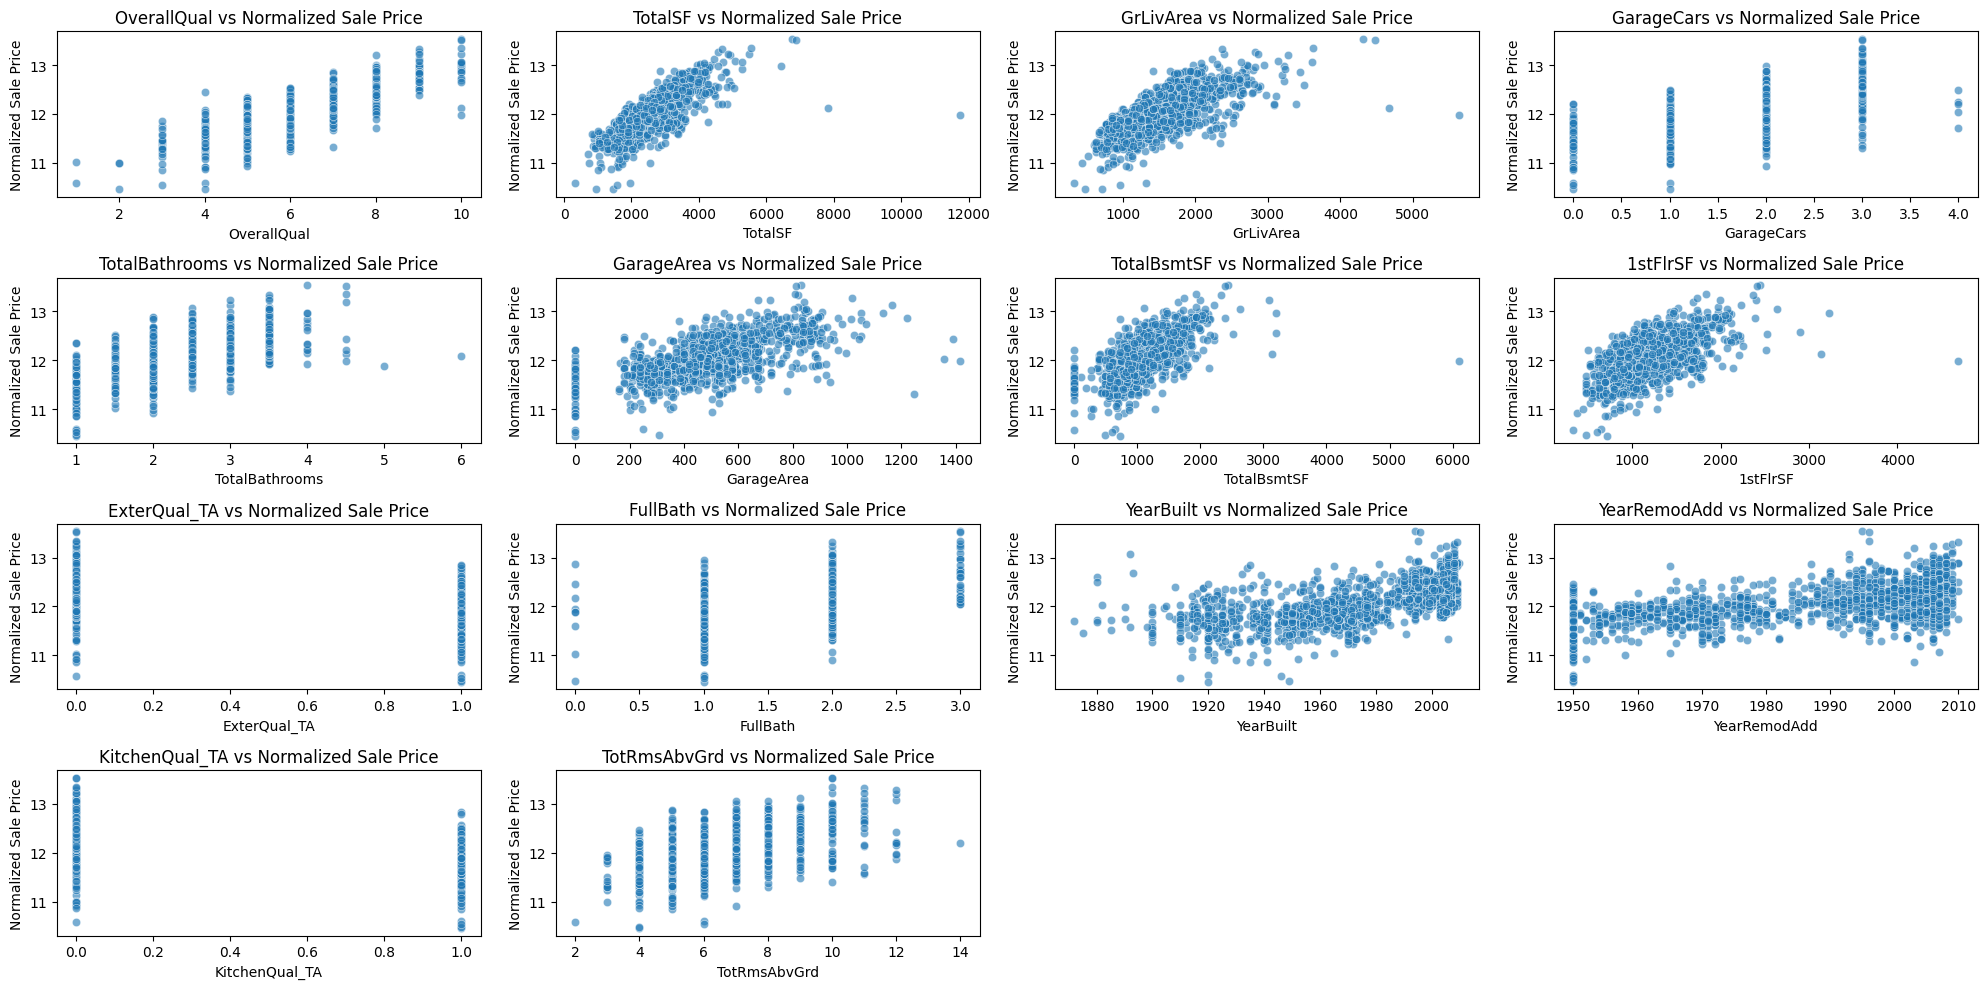

In [28]:
# Generating scatterplots of each top feature, including the newly created top features, vs SalePrice_normalized
plt.figure(figsize=(20, 10))
for idx, feature in enumerate(top_features_combined.index.to_list()):
    plt.subplot(4, 4, idx + 1)
    sns.scatterplot(x=reduced_train_cat[feature], y=reduced_train_cat['SalePrice_normalized'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Normalized Sale Price')
    plt.title(f'{feature} vs Normalized Sale Price')
plt.tight_layout()
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Evaluating multicollinearity among the top features using Variance Inflation Factor (VIF)
X = reduced_train_cat[top_features_combined.index].copy()
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Multicollinearity Check (VIF > 5 indicates potential issues):")
display(vif_data)

Multicollinearity Check (VIF > 5 indicates potential issues):


,Feature,VIF
0,OverallQual,58.373729
1,TotalSF,inf
2,GrLivArea,inf
3,GarageCars,34.207832
4,TotalBathrooms,21.332229
5,GarageArea,29.100978
6,TotalBsmtSF,inf
7,1stFlrSF,37.753256
8,ExterQual_TA,6.280281
9,FullBath,23.063600


We note that the certain features show infinite VIF values `TotalSF`, `GrLivArea`, and `TotalBsmtSF`, i.e., they are perfectly collinear. This is because `TotalSF` is derived by adding `TotalBsmtSF` and `GrLivArea`. Additionally, we expect high VIF values for(`YearBuilt`/`YearRemodAdd`) as these values are often identical for newer homes. While this can be ignored in an EDA, further modeling would not be very useful with the high amount of multicollinearity. We recommend combining these components into uncorrelated components (e.g., through Principal Component Analysis) before using linear regression techniques to explain or predict sale prices.

### 5. Using the dependent variable to perform both min-max and standard scaling

We will scale `SalePrice` using Min-Max and Standard scaling. Min-Max scaling will rescale `SalePrice` to a fixed range, with the minimum value being 0 and the maximum being 1. On the other hand, Standard scaling centers the data around a mean of 0 with a standard deviation of 1.

We will plot the min-max scaled, log-transformed, and standard scaled distributions to the original to understand how they change the scale of the data. 

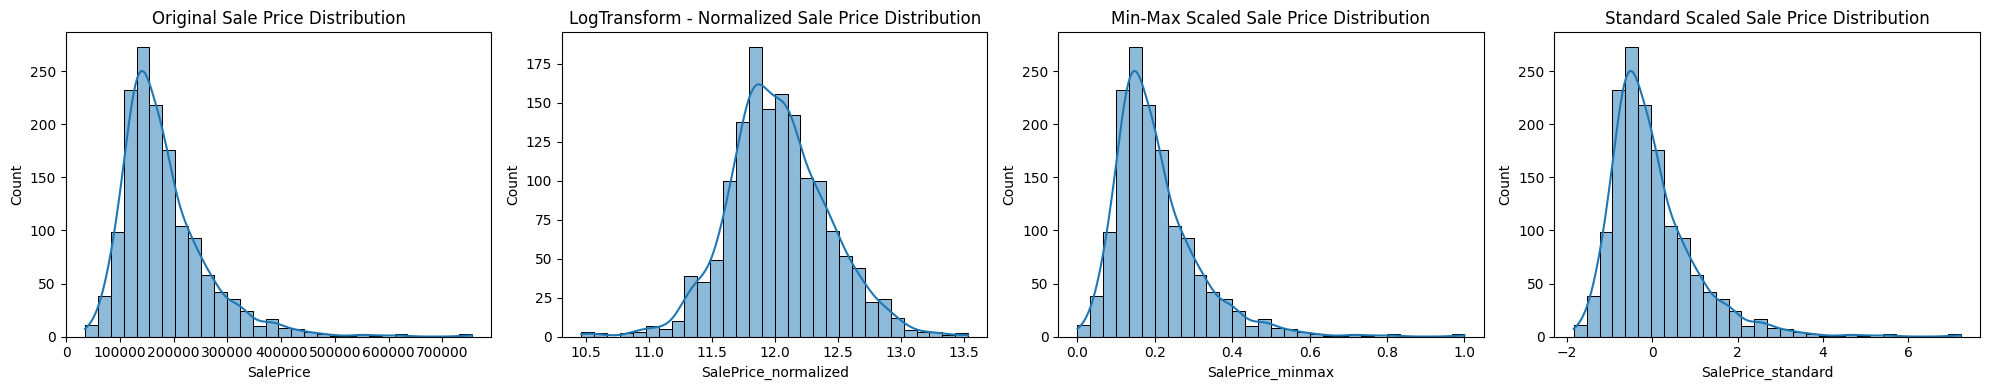

In [30]:
# Using the dependent variable, 'SalePrice' to perform both min-max and standard scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Fit and transform the 'SalePrice' using Min-Max scaling
reduced_train_cat['SalePrice_minmax'] = min_max_scaler.fit_transform(reduced_train_cat[['SalePrice']])

# Fit and transform the 'SalePrice' using Standard scaling
reduced_train_cat['SalePrice_standard'] = standard_scaler.fit_transform(reduced_train_cat[['SalePrice']])

# Plotting the distribution of the original and scaled SalePrice
plt.figure(figsize=(20, 4))

# Original SalePrice
plt.subplot(1, 4, 1)
sns.histplot(reduced_train_cat['SalePrice'], bins=30, kde=True)
plt.title('Original Sale Price Distribution')

# Normalized SalePrice
plt.subplot(1, 4, 2)
sns.histplot(reduced_train_cat['SalePrice_normalized'], bins=30, kde=True)
plt.title('LogTransform - Normalized Sale Price Distribution')

# Min-Max Scaled SalePrice
plt.subplot(1, 4, 3)
sns.histplot(reduced_train_cat['SalePrice_minmax'], bins=30, kde=True)
plt.title('Min-Max Scaled Sale Price Distribution')

# Standard Scaled SalePrice
plt.subplot(1, 4, 4)
sns.histplot(reduced_train_cat['SalePrice_standard'], bins=30, kde=True)
plt.title('Standard Scaled Sale Price Distribution')

plt.tight_layout()

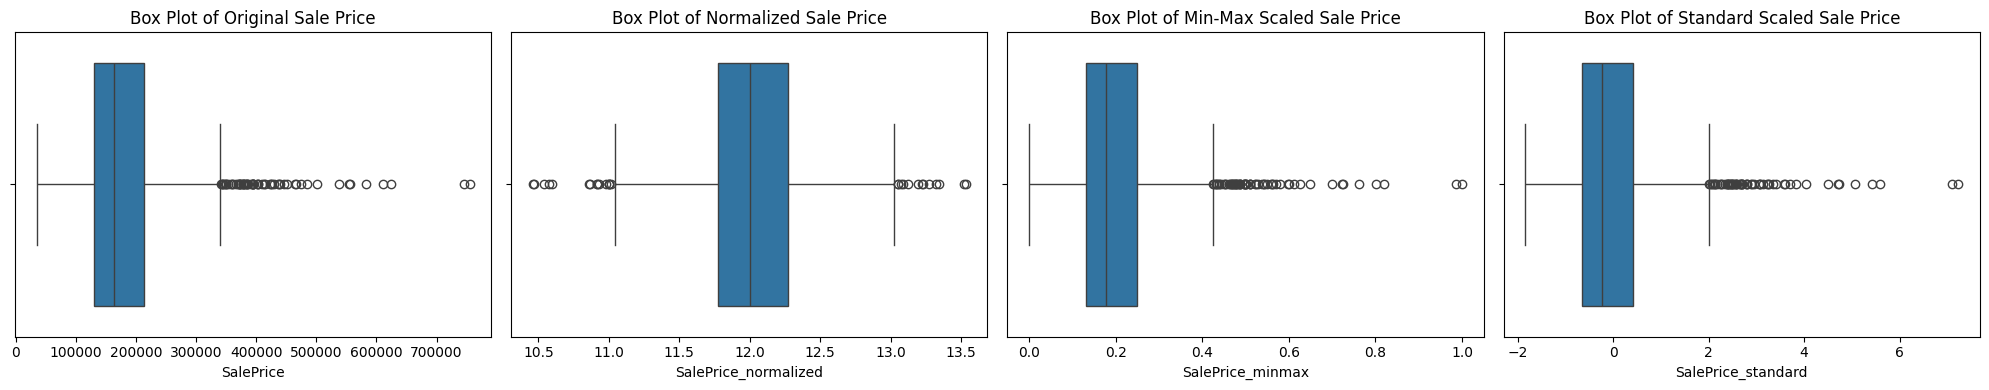

In [31]:
# Generating boxplots of the 'SalePrice', 'SalePrice_normalized', 'SalePrice_minmax', 'SalePrice_standard'
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
sns.boxplot(x=reduced_train_cat['SalePrice'])
plt.title('Box Plot of Original Sale Price')
plt.subplot(1, 4, 2)
sns.boxplot(x=reduced_train_cat['SalePrice_normalized'])
plt.title('Box Plot of Normalized Sale Price')
plt.subplot(1, 4, 3)
sns.boxplot(x=reduced_train_cat['SalePrice_minmax'])
plt.title('Box Plot of Min-Max Scaled Sale Price')
plt.subplot(1, 4, 4)
sns.boxplot(x=reduced_train_cat['SalePrice_standard'])
plt.title('Box Plot of Standard Scaled Sale Price')
plt.tight_layout()

In [32]:
# Adding quantitative comparison of scaling methods
scaling_comparison = pd.DataFrame({
    'Method': ['Original', 'Log-Normalized', 'Min-Max', 'Standard'],
    'Skewness': [
        train['SalePrice'].skew(),
        reduced_train_cat['SalePrice_normalized'].skew(),
        reduced_train_cat['SalePrice_minmax'].skew(),
        reduced_train_cat['SalePrice_standard'].skew()
    ],
    'Best_For': [
        'Tree-based models',
        'Linear models, interpretability',
        'Neural networks (0-1 range)',
        'SVM, algorithms assuming normality'
    ]
})
display(scaling_comparison)

,Method,Skewness,Best_For
0,Original,1.882876,Tree-based models
1,Log-Normalized,0.121347,"Linear models, interpretability"
2,Min-Max,1.882876,Neural networks (0-1 range)
3,Standard,1.882876,"SVM, algorithms assuming normality"


As mentioned in the assignment requirements, some methods (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale.  Since we want to understand what moves the Sale Prices up or down, we want to establish linear relationships with the other variables.

In the histograms, we see that the Sale Prices (including the standardized and min-max scaled distributions) are heavily right-skewed and we applied log transformation to normalize the skewness. As observed in the histogram, the normalization helps us better understand linear relationships by bringing large values closer to "normal" and creates a bell-shaped distribution. This also reduces the impact of outliers when modeling the data using sensitive models like linear regression. In the box plot, we can observe that the outliers are somewhat more evenly distributed in the case of normalized Sale Prices. To summarize, the transformation method of choice heavily depends not only on the data's distribution but also the intention behind the same.

Considering the management/research question, log normalization would be the most helpful as it improves the linearity of relationships between SalePrice and key predictors (e.g., GrLivArea, TotalSF), allowing us to examine what makes the home prices go up or down.

<br>

### 6. Conclusion

In this exploratory data analysis (EDA), we:

- Evaluated the size and shape of the training data and generate summary statistics for the whole dataset. 
- Analyzed `SalePrice`, identified that it skews right, and elected to normalize it using `{np.log1p}` to better understand linear relationships.
- Investigated the dataset for missing values and then elected to drop features which were incomplete or mostly blank. 
- Analyzed top predictors of house prices using correlation and scatterplots, focusing on variables like `GrLivArea`, `GarageCars`, and `TotalBsmtSF`. We also generated dummies for categorical variables and evaluated their correlation.
- Created new features and included two of them (1) `TotalSF` (total square footage) & (2) `TotalBathrooms` (total number of bathrooms), as they exhibited correlation at the same level or higher than the previously identified top features.
- Performed min-max and standard scaling on the normalized `SalePrice` to check if it would produce distributions that could help us understand the linear relationships better.

Through this EDA, we began understanding the main drivers of home prices in Ames, Iowa and also prepare the training data to build predictive models. The results of this EDA can be helpful for a wide variety of stakeholders like real-estate agents (who can use this to evaluate what the listing price should be for a house), buyers (who can negotiate lower prices), sellers (who can command higher prices), and governments (who can assess home values for property taxes).

<b> Methodological Assumptions and Limitations </b>

**Assumptions:**
- Linear relationships exist between predictors and the sale price
- Missing data is missing due to randomness for the variables dropped
- Outliers represent a legitimate market segment rather than unrelated data points or data errors

**Limitations:**
- The dataset considers a time when the United States was facing a housing crisis (2006-2010), which might impact utility of the analysis
- The analysis does not consider home proximity to good schools, places of interest, and other indicators. 